In [1]:
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black

In [2]:
import os

os.chdir("..")
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [3]:
import io
import torch
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image

from orthogonal_dfa.l_star.examples.bernoulli_parity import BernoulliRegex
from orthogonal_dfa.l_star.structures import DecisionTreeLeafNode
from orthogonal_dfa.l_star.sampler import UniformSampler
from orthogonal_dfa.l_star.decision_tree_to_dfa import *
from orthogonal_dfa.utils.pdfa import batched_iterated_matrix_multiply

In [4]:
oracle = BernoulliRegex(0.6, 0, regex=r".*111111.*")

In [5]:
us = UniformSampler(40)

In [9]:
rng = np.random.default_rng(0)
np.mean([oracle.membership_query(us.sample(rng, alphabet_size=2)) for _ in range(1000)])

np.float64(0.447)

In [16]:
pst = PrefixSuffixTracker.create(
    us,
    np.random.default_rng(0),
    oracle,
    alphabet_size=2,
    num_prefixes=10_000,
    suffix_family_size=100,
    chi_squared_p_min=0.005,
    evidence_thresh=0.55,
    suffix_prevalence=0.05,
)
# dt = pst.extract_decision_tree()

Starting synthesis iteration with 10000 prefixes


Completing suffix family:   1%|1         | 1/99 [00:01<01:53,  1.16s/it]

Num states: 1; processing []


Prepending to all suffixes:   4%|4         | 4/100 [00:01<00:27,  3.55it/s]

Prepending to all suffixes:   4%|4         | 4/100 [00:01<00:26,  3.63it/s]

Num states: 2; processing [1]
Done
Num states: 2; processing [0]
Done
Extracted flat decision tree with 2 states
Best DFA has success rate on 'correct' states 0.5000


  0%|          | 0/500 [00:00<?, ?it/s]

Adding new prefixes:  10%|#         | 51/500 [00:01<00:08, 50.26it/s]

[0.628 0.888 0.912 0.9   0.912]


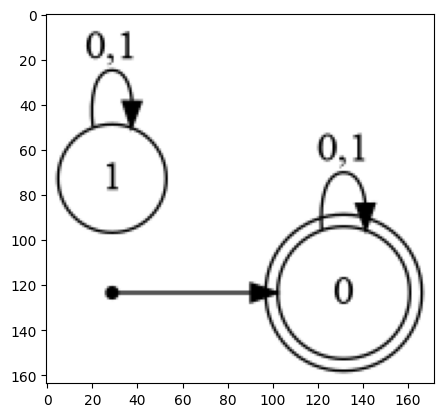

Starting synthesis iteration with 10500 prefixes
Num states: 1; processing []


Prepending to all suffixes:  91%|#########1| 91/100 [00:01<00:00, 70.09it/s]

Prepending to all suffixes:  91%|#########1| 91/100 [00:01<00:00, 70.11it/s]

Num states: 2; processing [1]


Prepending to all suffixes:   4%|4         | 4/100 [00:01<00:31,  3.00it/s]

Prepending to all suffixes:   4%|4         | 4/100 [00:01<00:28,  3.36it/s]

Num states: 3; processing [1, 1]
Done
Num states: 3; processing [0, 1]
Done
Num states: 3; processing [0]
Done
Extracted flat decision tree with 3 states
Best DFA has success rate on 'correct' states 0.5000


  0%|          | 0/500 [00:00<?, ?it/s]

Adding new prefixes:   7%|7         | 36/500 [00:01<00:12, 35.77it/s]

[0.266 0.682 0.836 0.86  0.882]


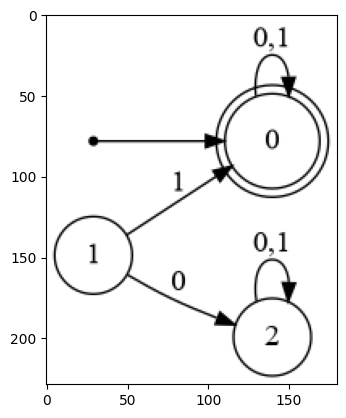

Starting synthesis iteration with 11000 prefixes
Num states: 1; processing []


Prepending to all suffixes:  62%|######2   | 62/100 [00:01<00:00, 59.95it/s]

Prepending to all suffixes:  62%|######2   | 62/100 [00:01<00:00, 58.08it/s]

Num states: 2; processing [1]


Prepending to all suffixes:  62%|######2   | 62/100 [00:01<00:00, 59.61it/s]

Prepending to all suffixes:  62%|######2   | 62/100 [00:01<00:00, 60.31it/s]

Num states: 3; processing [1, 1]


Prepending to all suffixes:   4%|4         | 4/100 [00:01<00:30,  3.15it/s]

Prepending to all suffixes:   4%|4         | 4/100 [00:01<00:30,  3.12it/s]

Num states: 4; processing [1, 1, 1]


Prepending to all suffixes:   4%|4         | 4/100 [00:01<00:31,  3.07it/s]

Prepending to all suffixes:   4%|4         | 4/100 [00:01<00:30,  3.15it/s]

Num states: 5; processing [1, 1, 1, 1]


Prepending to all suffixes:   4%|4         | 4/100 [00:01<00:31,  3.04it/s]

Prepending to all suffixes:   4%|4         | 4/100 [00:01<00:29,  3.23it/s]

Num states: 6; processing [1, 1, 1, 1, 1]


Prepending to all suffixes:   4%|4         | 4/100 [00:01<00:29,  3.24it/s]

Prepending to all suffixes:   4%|4         | 4/100 [00:01<00:29,  3.21it/s]

Num states: 7; processing [1, 1, 1, 1, 1, 1]
Done
Num states: 7; processing [0, 1, 1, 1, 1, 1]
Done
Num states: 7; processing [0, 1, 1, 1, 1]
Done
Num states: 7; processing [0, 1, 1, 1]
Done
Num states: 7; processing [0, 1, 1]
Done
Num states: 7; processing [0, 1]
Done
Num states: 7; processing [0]
Done
Extracted flat decision tree with 7 states
Best DFA has success rate on 'correct' states 0.9950
Achieved desired accuracy of 0.9; stopping synthesis


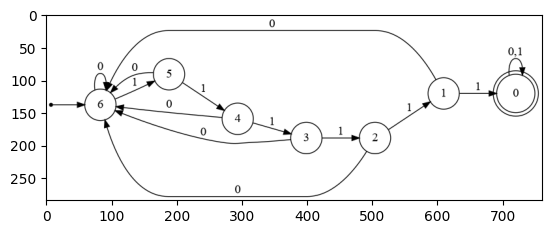

In [17]:
for dfa, results in counterexample_driven_synthesis(
    pst, min_state_size=0.01, additional_counterexamples=500, acc_threshold=0.9
):
    if results is not None:
        print(np.mean([r[0][-5:] for r in results], 0))
    plt.imshow(Image.open(io.BytesIO(dfa.show_diagram().draw(format="png"))))
    plt.show()

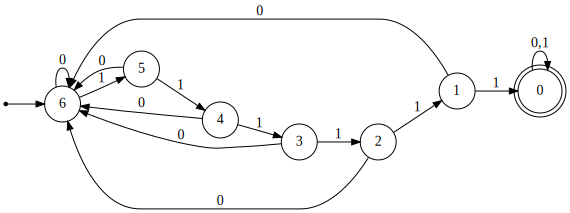

In [18]:
dfa